<a href="https://colab.research.google.com/github/ITanmayee/wise_ml/blob/main/SVM_Red_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2021-05-13 13:37:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2021-05-13 13:37:10 (590 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/winequality-red.csv', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

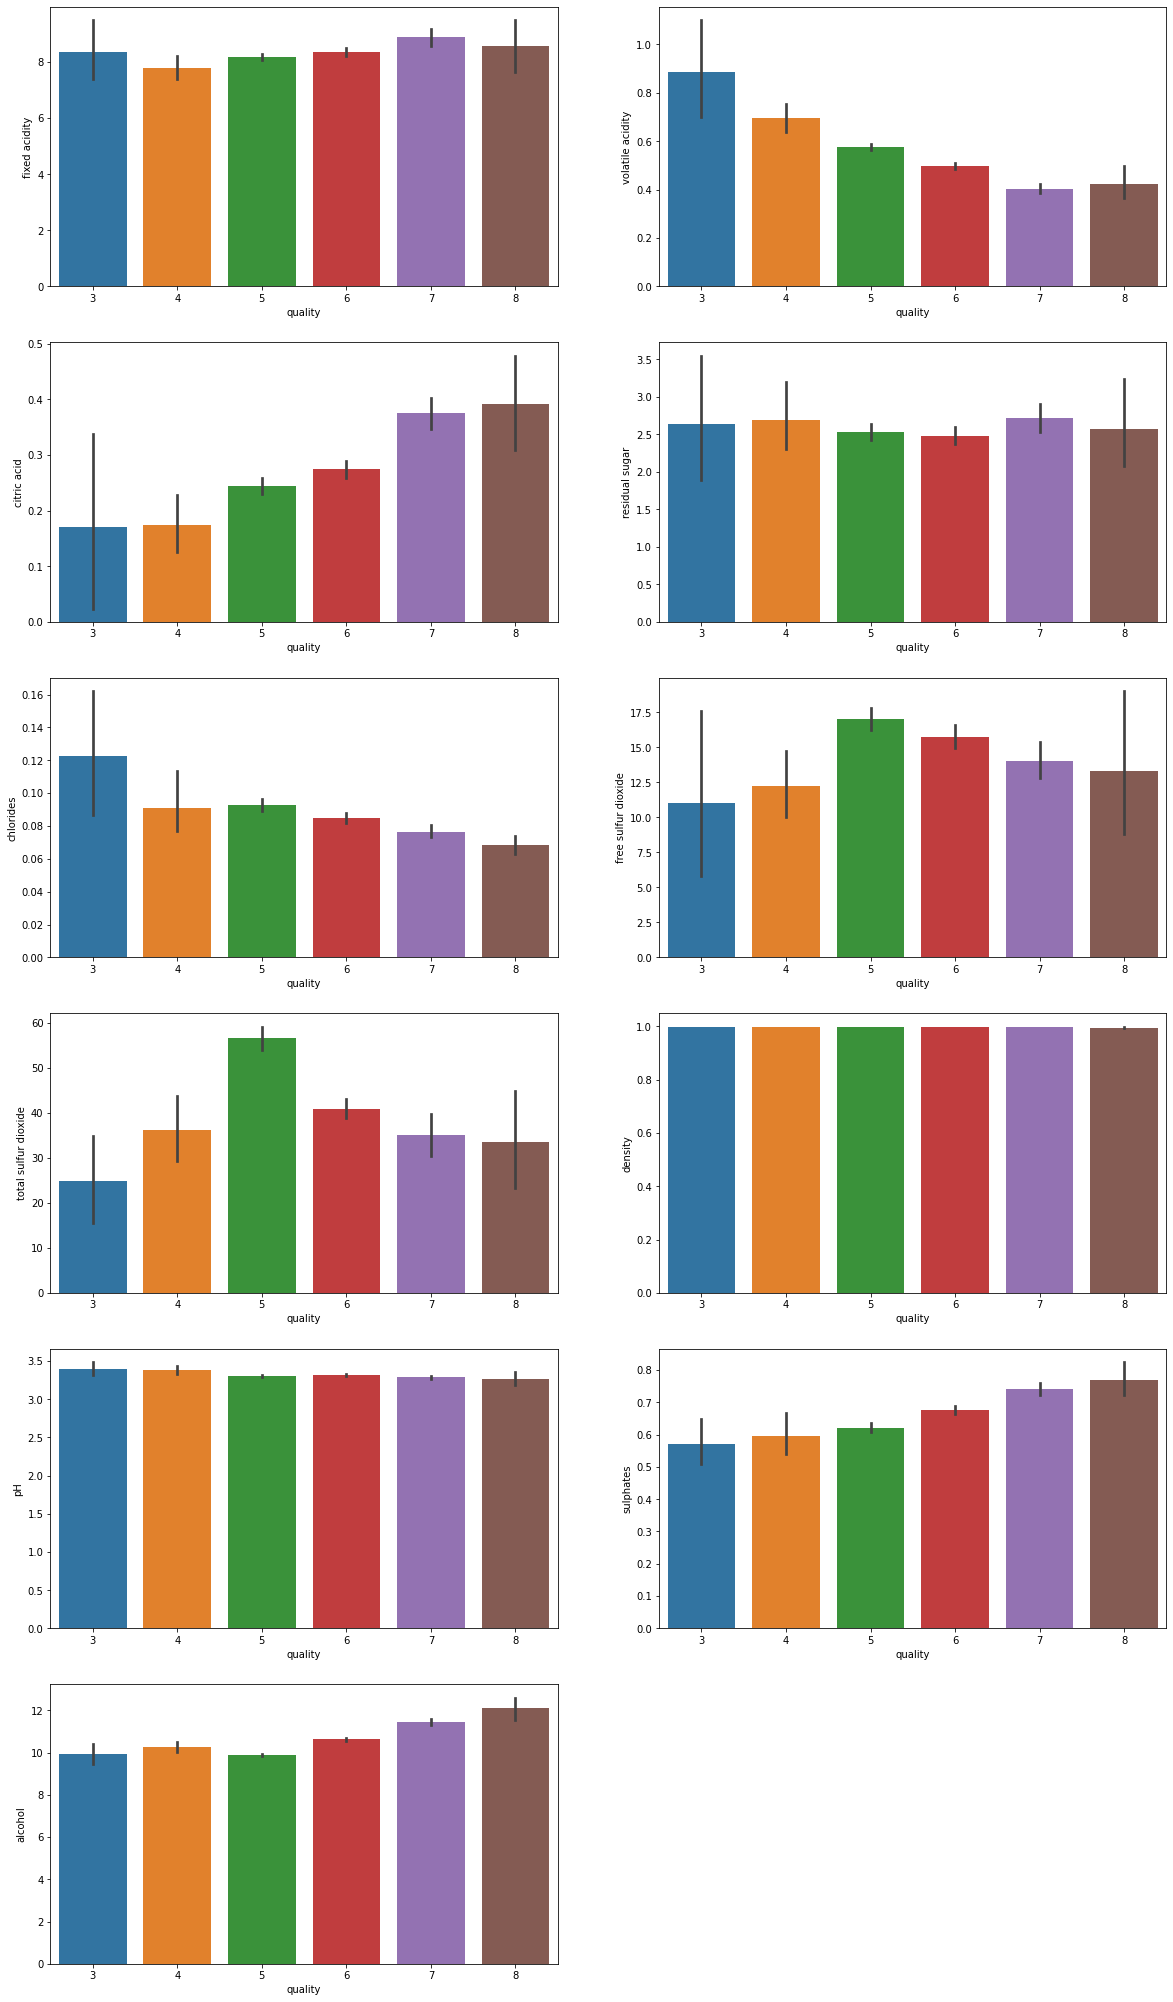

In [7]:
def plot_bar(data, cols):
    fig = plt.figure(figsize=(20, 36))
    for loc, col in enumerate(cols):
        plt.subplot(6, 2, loc+1)
        sns.barplot(x='quality', y=col, data=data)
plot_bar(data, data.columns[:-1])
plt.show()

In [8]:
params = [2, 6, 8]
groups = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], labels=groups, bins=params)

In [10]:
data['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [13]:
features = data.drop(['quality'], axis=1)
target = data['quality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape

(1279, 11)

In [16]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

train_pred = svc_model.predict(X_train)
test_pred = svc_model.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Test accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Train accuracy: 86.787%
Test accuracy: 85.625%


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {
    'C': [0.05, 0.9, 1.2],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.05, 0.9, 1.2, 1.5]
    }

In [23]:
clf_model = GridSearchCV(svc_model, param_grid=parameters, scoring='accuracy', cv=15)

In [24]:
clf_model.fit(X_train, y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.9, 1.2], 'gamma': [0.05, 0.9, 1.2, 1.5],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [25]:
clf_model.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}